In [27]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [28]:
df = pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [29]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

There are not any null values by itself, although garbage values could exist.

In [30]:
nominales = ["Month", "Type_of_Loan"] # Sin ID, Customer_ID, ni Name
ordinales = ["Occupation", 'Credit_Mix',
           'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'
           ]
intervalo = []
razon = ["Age", "SSN", 'Annual_Income', 'Monthly_Inhand_Salary','Num_Bank_Accounts', 'Num_Credit_Card', 
         'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
         "Num_Credit_Inquiries", "Outstanding_Debt",'Credit_Utilization_Ratio', 'Credit_History_Age', 
         "Total_EMI_per_month", 'Amount_invested_monthly','Monthly_Balance'
         ]

In [31]:
for i in nominales + ordinales:
    print(i)
    df[i].unique()
    print()

Month


array([1, 2, 3, 4, 5, 6, 7, 8])


Type_of_Loan


array(['auto loan,credit-builder loan,personal loan,home equity loan',
       'credit-builder loan', 'auto loan,auto loan,not specified', ...,
       'home equity loan,auto loan,auto loan,auto loan',
       'payday loan,student loan,mortgage loan,not specified',
       'personal loan,auto loan,mortgage loan,student loan,student loan'],
      shape=(6261,), dtype=object)


Occupation


array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)


Credit_Mix


array(['Good', 'Standard', 'Bad'], dtype=object)


Payment_of_Min_Amount


array(['No', 'NM', 'Yes'], dtype=object)


Payment_Behaviour


array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)


Credit_Score


array(['Good', 'Standard', 'Poor'], dtype=object)

In [32]:
for i in nominales + ordinales: 
    df[i] = df[i].astype('category')
    
for i in nominales + ordinales:
    print(i)
    #df[i].value_counts()
    df[i].value_counts(normalize = True) # Saca la proporción
    print()

Month


Month
1    0.125
2    0.125
3    0.125
4    0.125
5    0.125
6    0.125
7    0.125
8    0.125
Name: proportion, dtype: float64


Type_of_Loan


Type_of_Loan
No Data                                                                                                                     0.11408
not specified                                                                                                               0.01408
credit-builder loan                                                                                                         0.01280
personal loan                                                                                                               0.01272
debt consolidation loan                                                                                                     0.01264
                                                                                                                             ...   
student loan,student loan,student loan,debt consolidation loan,home equity loan,debt consolidation loan,payday loan         0.00008
student loan,student loan,student loan,home equity loan        


Occupation


Occupation
Lawyer           0.07096
Engineer         0.06864
Architect        0.06824
Mechanic         0.06776
Scientist        0.06744
Accountant       0.06744
Developer        0.06720
Media_Manager    0.06720
Teacher          0.06672
Entrepreneur     0.06648
Doctor           0.06568
Journalist       0.06536
Manager          0.06432
Musician         0.06352
Writer           0.06304
Name: proportion, dtype: float64


Credit_Mix


Credit_Mix
Standard    0.45848
Good        0.30384
Bad         0.23768
Name: proportion, dtype: float64


Payment_of_Min_Amount


Payment_of_Min_Amount
Yes    0.52326
No     0.35667
NM     0.12007
Name: proportion, dtype: float64


Payment_Behaviour


Payment_Behaviour
Low_spent_Small_value_payments      0.28580
High_spent_Medium_value_payments    0.18988
Low_spent_Medium_value_payments     0.14962
High_spent_Large_value_payments     0.14639
High_spent_Small_value_payments     0.12043
Low_spent_Large_value_payments      0.10788
Name: proportion, dtype: float64


Credit_Score


Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

## Duplicados

In [33]:
df[df.duplicated()]
num_duplicados = df.duplicated(keep=False).sum()
print("Number of duplicates:", num_duplicados)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


Number of duplicates: 0


In [34]:
for i in razon:
    df[i] = df[i].round(2)

In [35]:
razon = ["Age", 'Annual_Income', 'Monthly_Inhand_Salary','Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 
         'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
         "Num_Credit_Inquiries", "Outstanding_Debt",'Credit_Utilization_Ratio', 'Credit_History_Age', 
         "Total_EMI_per_month", 'Amount_invested_monthly','Monthly_Balance'
         ]

# Building our traditional model

Next we will analyze the ratio variables to see which ones are better to select for our model

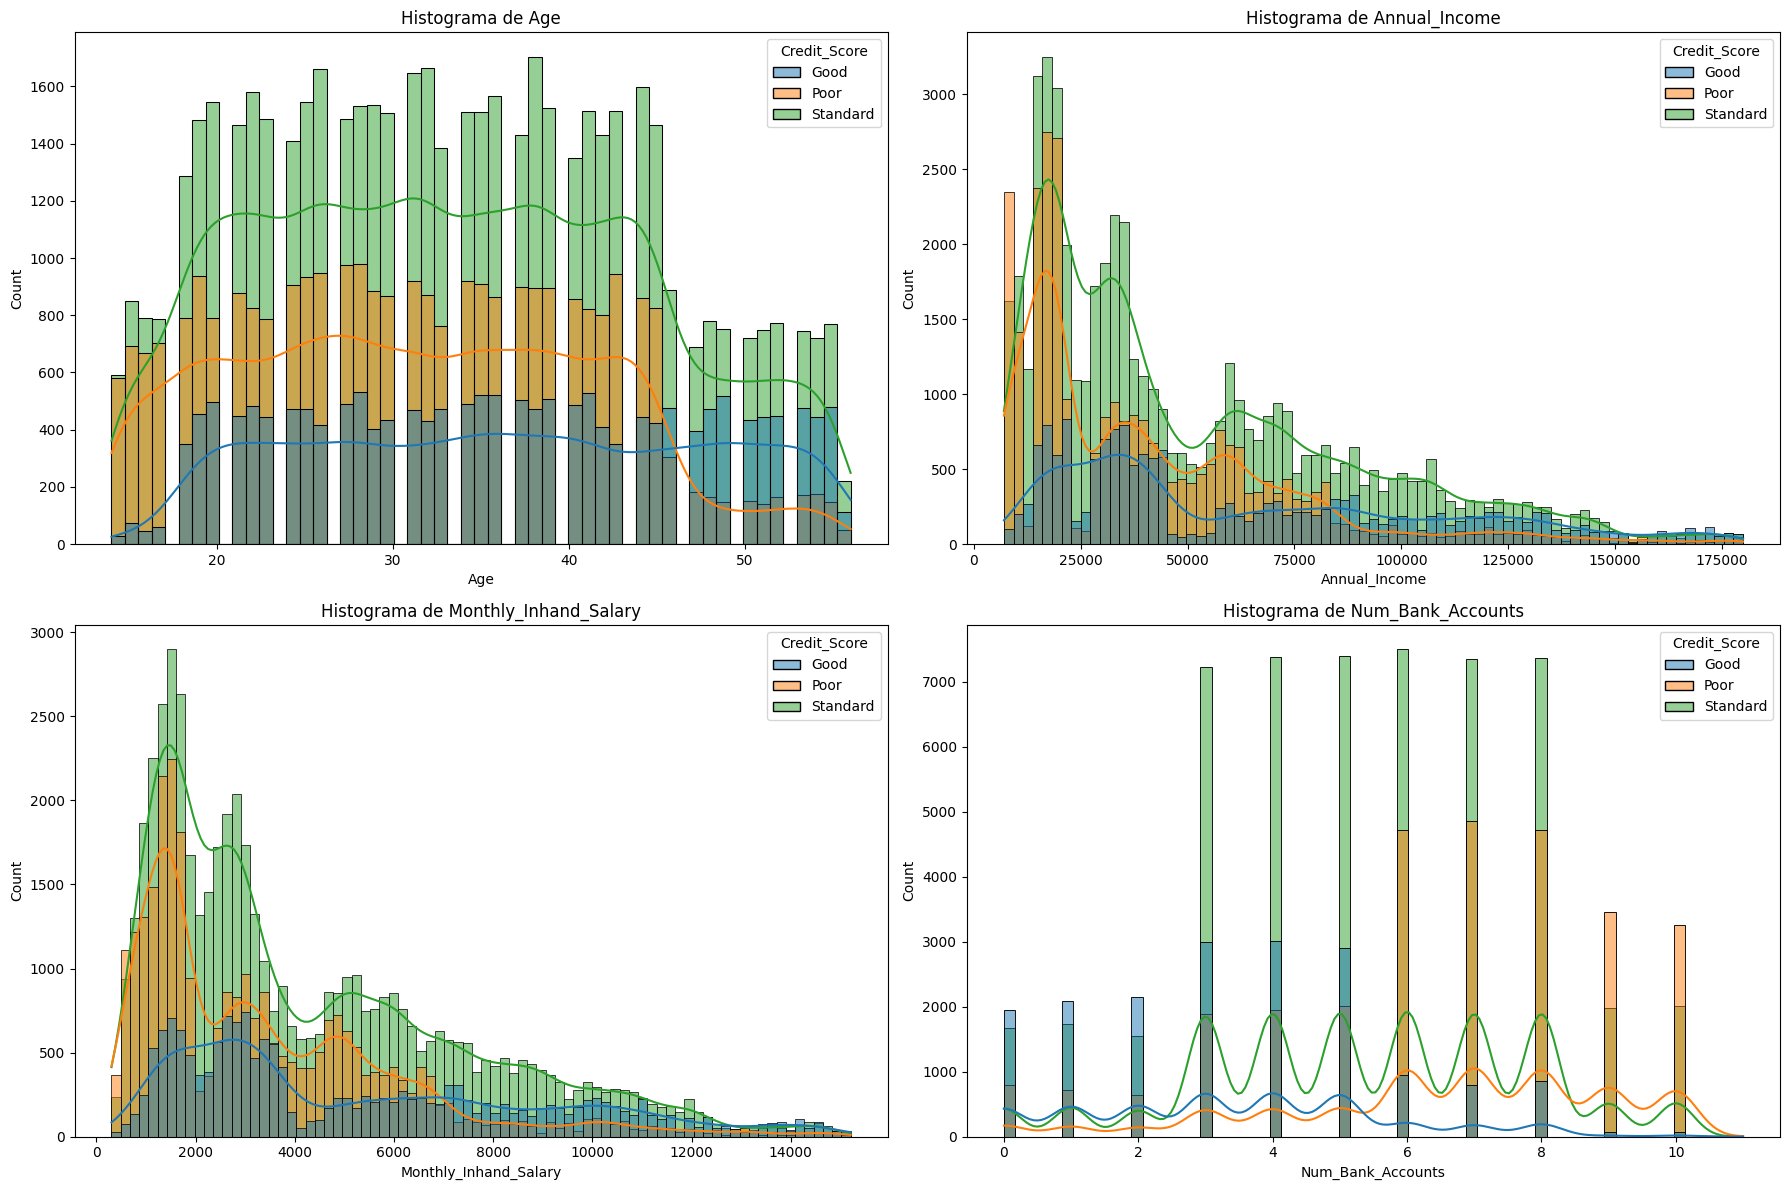

In [36]:
cols = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts"]
hue = ['Credit_Score']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 filas, 2 columnas

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue="Credit_Score", kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Histograma de {col}")

plt.tight_layout()
plt.show();

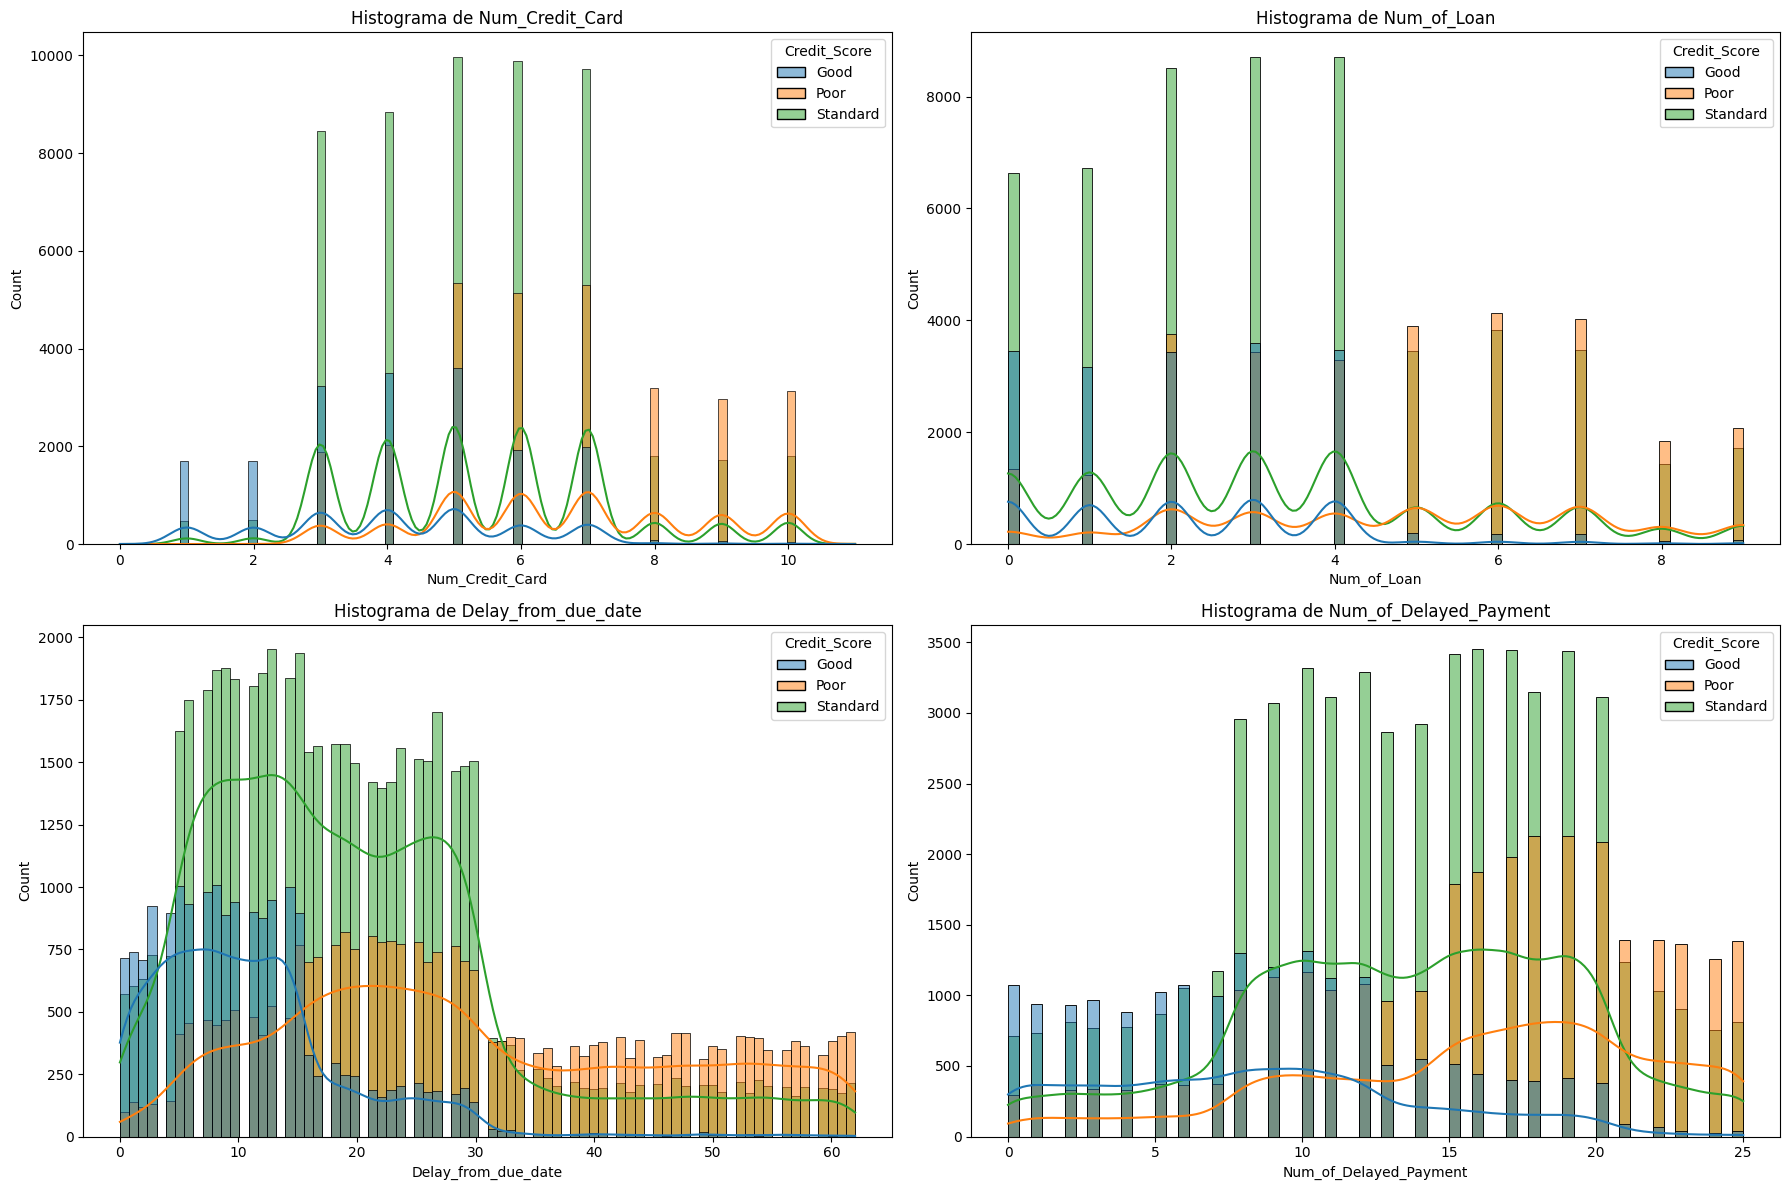

In [37]:
cols = ['Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment']
hue = ['Credit_Score']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 filas, 2 columnas

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue="Credit_Score", kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Histograma de {col}")

plt.tight_layout()
plt.show();

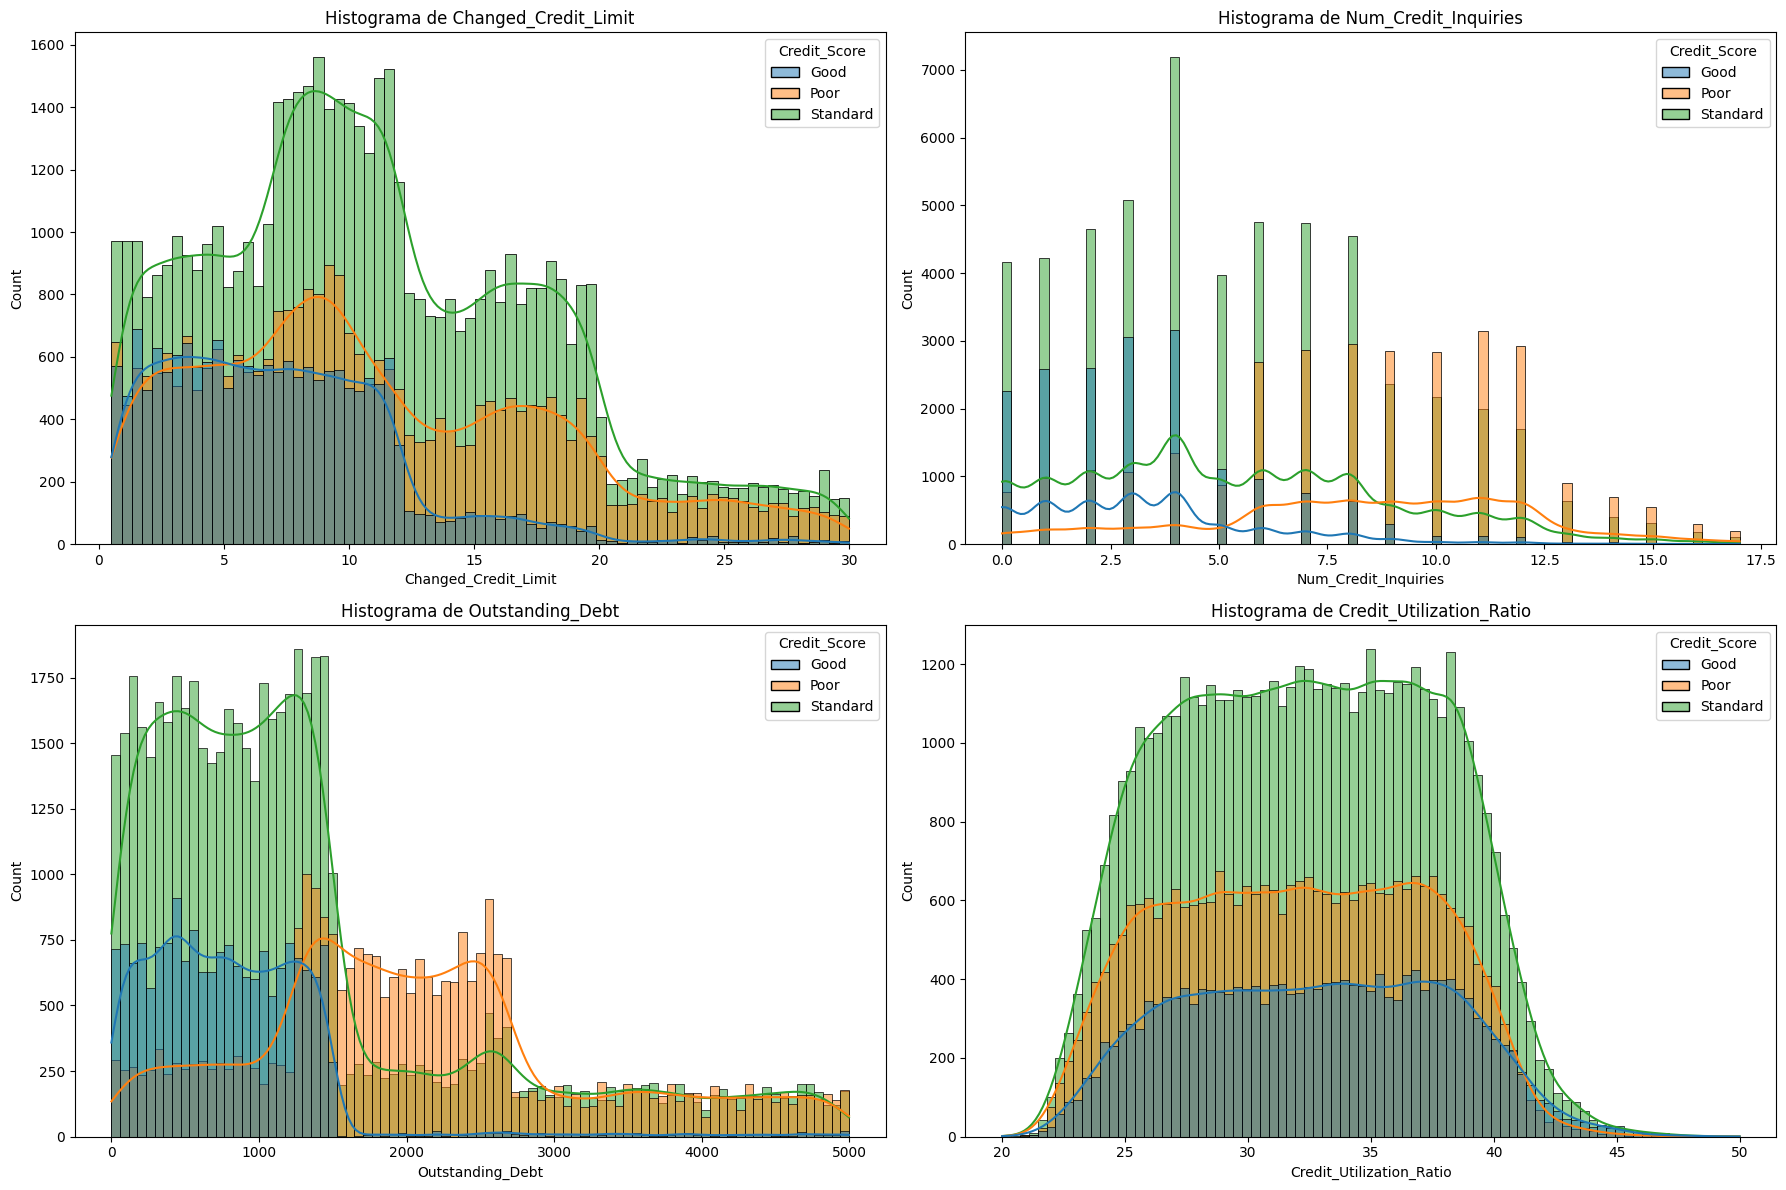

In [38]:
cols = ['Changed_Credit_Limit', 
         "Num_Credit_Inquiries", "Outstanding_Debt",'Credit_Utilization_Ratio']
hue = ['Credit_Score']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 filas, 2 columnas

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue="Credit_Score", kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Histograma de {col}")

plt.tight_layout()
plt.show();

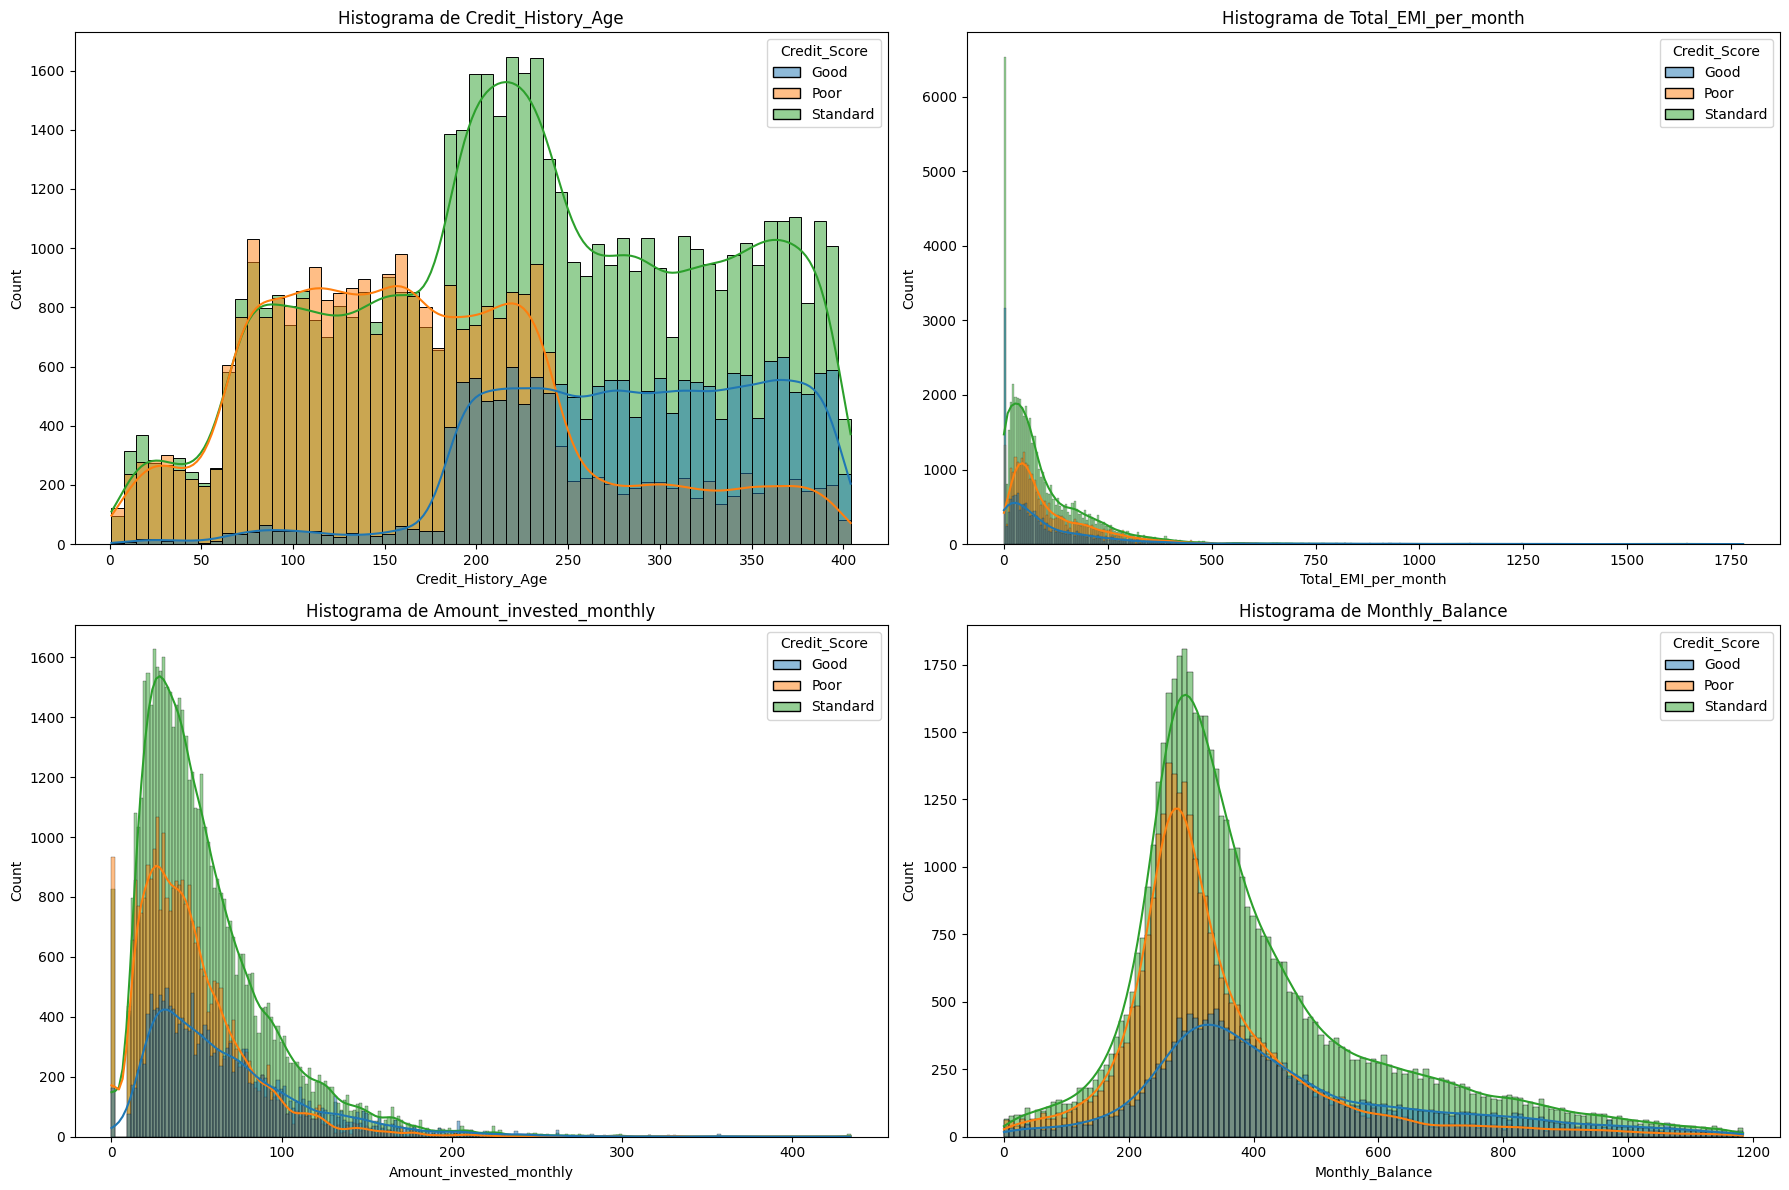

In [39]:
cols = ['Credit_History_Age', 
         "Total_EMI_per_month", 'Amount_invested_monthly','Monthly_Balance']
hue = ['Credit_Score']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 filas, 2 columnas

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue="Credit_Score", kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Histograma de {col}")

plt.tight_layout()
plt.show();

## The next 4 were selected:
"Num_Bank_Accounts", 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment'

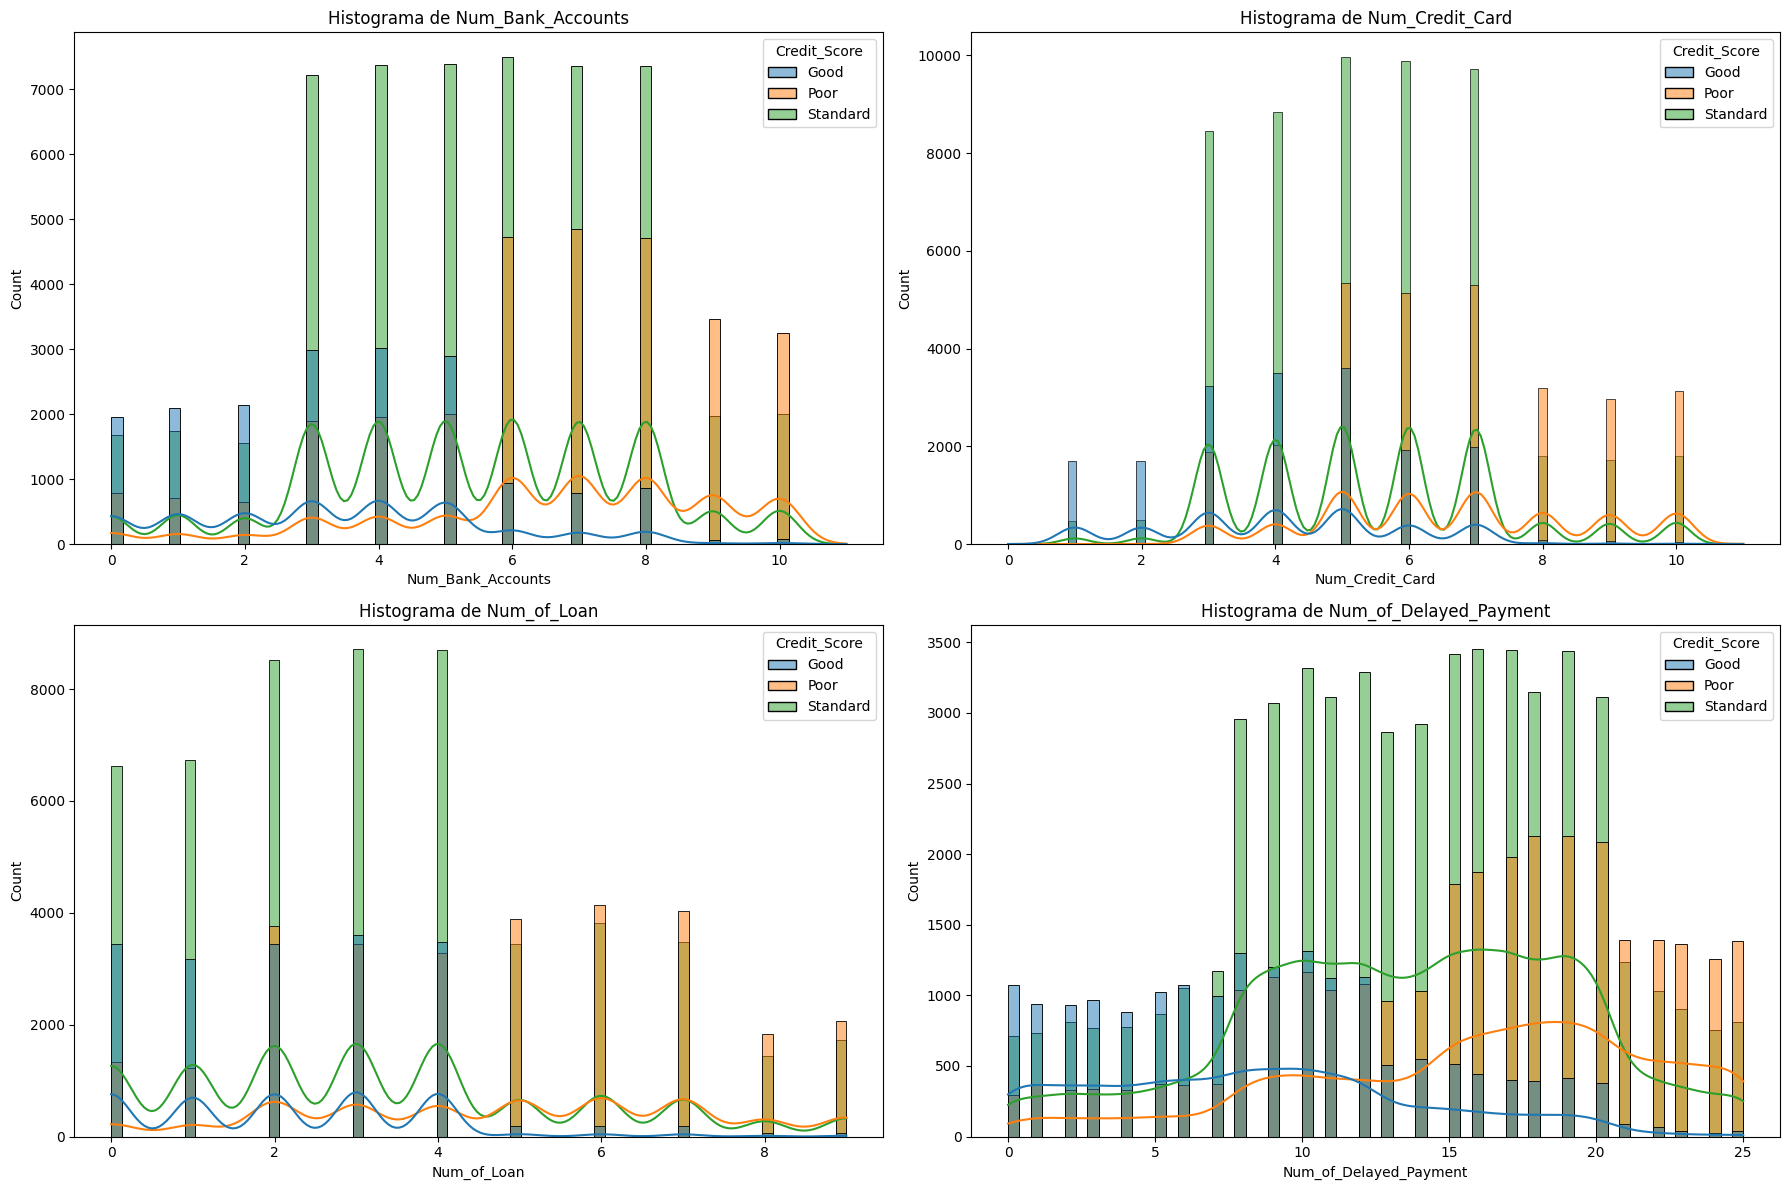

In [40]:
cols = ["Num_Bank_Accounts", 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment']
hue = ['Credit_Score']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 filas, 2 columnas

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue="Credit_Score", kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Histograma de {col}")

plt.tight_layout()
plt.show();

In [41]:
df1 = df[["Num_Bank_Accounts", 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment', "Credit_Score"]]
df1
nombre_archivo = "Credit1.csv"

# Utiliza el método to_csv para guardar el DataFrame en un archivo CSV
df1.to_csv(nombre_archivo, index=False)  # El argumento index=False evita que se guarde el índice del DataFrame en el archivo CSV

,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Num_of_Delayed_Payment,Credit_Score
0,3.0,4.0,4.0,7.0,Good
1,3.0,4.0,4.0,4.0,Good
2,3.0,4.0,4.0,7.0,Good
3,3.0,4.0,4.0,4.0,Good
4,3.0,4.0,4.0,4.0,Good
...,...,...,...,...,...
99995,4.0,6.0,2.0,7.0,Poor
99996,4.0,6.0,2.0,7.0,Poor
99997,4.0,6.0,2.0,6.0,Poor
99998,4.0,6.0,2.0,6.0,Standard


In [42]:
# Función para asignar puntajes a cada criterio
def one(bank):
    if 0 <= bank <= 2:
        return 3
    elif 3 <= bank <= 8:
        return 2
    elif bank >= 9:
        return 1

def two(num):
    if 0 <= num <= 2:
        return 3
    elif 3 <= num <= 7:
        return 2
    elif num > 7:
        return 1

def three(num):
    if 0 <= num <= 4:
        return 2
    else:
        return 1

def four(num):
    if 0 <= num <= 6:
        return 3
    elif 7 <= num <= 20:
        return 2
    elif num > 20:
        return 1

# "Num_Bank_Accounts", 'Num_Credit_Card', 'Num_of_Loan', ''Num_of_Delayed_Payment''
# Aplicar las funciones a cada fila del DataFrame
df1["Score"] = (
    df1["Num_Bank_Accounts"].apply(one) +
    df1['Num_Credit_Card'].apply(two) +
    df1['Num_of_Loan'].apply(three) +
    df1['Num_of_Delayed_Payment'].apply(four) 
)

# De 4 a 18
# Asignar categoría Good o Bad
df1["Predicted_Category"] = df1["Score"].apply(lambda x: 
    "Poor" if 4 <= x <= 6 else 
    "Standard" if 7 <= x <= 8 else 
    "Good"
)

C:\Users\patri\AppData\Local\Temp\ipykernel_30672\3261391315.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Score"] = (
C:\Users\patri\AppData\Local\Temp\ipykernel_30672\3261391315.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Predicted_Category"] = df1["Score"].apply(lambda x:


#### *The final scores and classifications made by our model are as follows:*
+ Poor: 4 to 6 points
+ Standard: 7 to 8 points
+ Good: 9 to 12 points

C:\Users\patri\AppData\Local\Temp\ipykernel_30672\2094604404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1['Credit_Score'], y=df1['Score'], palette="Set2")


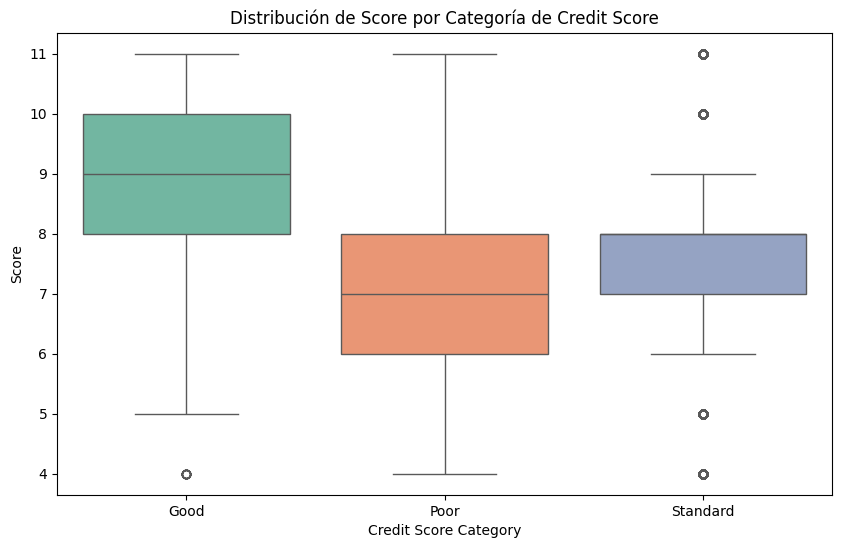

In [43]:
# Crear un gráfico de distribución usando un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Credit_Score'], y=df1['Score'], palette="Set2")

# Etiquetas y título
plt.xlabel("Credit Score Category")
plt.ylabel("Score")
plt.title("Distribución de Score por Categoría de Credit Score")
plt.show();

C:\Users\patri\AppData\Local\Temp\ipykernel_30672\3299940083.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Credit Score")


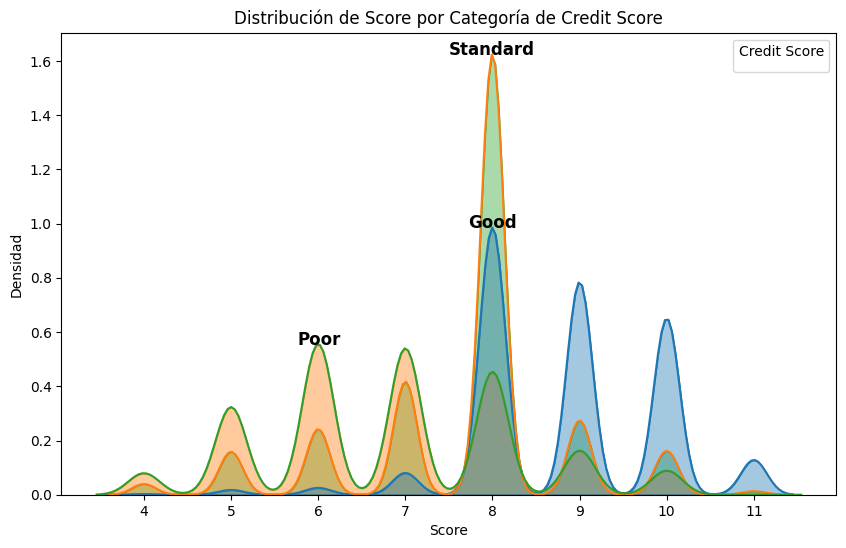

In [44]:
# Configurar la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico KDE
ax = sns.kdeplot(data=df1, x="Score", hue="Credit_Score", fill=True, common_norm=False, alpha=0.4)

# Encontrar los picos de cada distribución
for category in df1["Credit_Score"].unique():
    subset = df1[df1["Credit_Score"] == category]["Score"]
    kde = sns.kdeplot(subset, bw_adjust=1).get_lines()[-1]  # Obtener la última línea dibujada
    x, y = kde.get_data()
    max_idx = np.argmax(y)  # Índice del máximo valor de densidad
    plt.text(x[max_idx], y[max_idx], f"{category}", fontsize=12, ha="center", fontweight="bold")

# Personalizar el gráfico
plt.title("Distribución de Score por Categoría de Credit Score")
plt.xlabel("Score")
plt.ylabel("Densidad")
plt.legend(title="Credit Score")
plt.show();

In [45]:
#df1.head(20)
#df1.tail(20)
a = (df1["Credit_Score"] == df1["Predicted_Category"]).sum()
a/len(df1)

np.float64(0.60081)

## Logistic Regression

A Logistic Regression is made to work as a benchmark. Almost all the ratio variables were used while the others ones where deleted

In [46]:
# Quitamos IDS y todas las nominales, las ordinales está por verse pero por el momento las quitamos
# También quitamos algunas de razon
nominales
ordinales
dfl = df.drop(["ID", "Customer_ID", "Month", "Name", "SSN", "Occupation", "Credit_Mix", "Type_of_Loan", 'Payment_of_Min_Amount',
 'Payment_Behaviour'], axis = 1)

['Month', 'Type_of_Loan']

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
X = dfl.iloc[:, :-1]  # Todas las columnas excepto la última
y = dfl.iloc[:, -1]   # Solo la última columna
y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
#print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

LogisticRegression()

Accuracy: 0.63965


Our traditional credit model was approximately 3% points lower in accuracy.

## Modifying our model so it can accept new applicants and throw a result:

In [ ]:
def get_valid_input(prompt):
    while True:
        try:
            return int(input(prompt))
        except ValueError:
            print("Invalid input. Please enter a valid integer value.")

def get_credit_score():
    bank_accounts = get_valid_input("Enter the number of bank accounts: ")
    credit_cards = get_valid_input("Enter the number of credit cards: ")
    loans = get_valid_input("Enter the number of loans: ")
    delayed_payments = get_valid_input("Enter the number of delayed payments: ")
    
    score = (one(bank_accounts) +
             two(credit_cards) +
             three(loans) +
             four(delayed_payments))
    
    if 4 <= score <= 6:
        category = "Poor"
    elif 7 <= score <= 8:
        category = "Standard"
    else:
        category = "Good"
    
    print(f"Your credit score is {score}, and your category is {category}.")

if __name__ == "__main__":
    get_credit_score()

# 3, 4, 4, 7

Your credit score is 7, and your category is Standard.


()

In [ ]:
from fredapi import Fred
fred_key = 'bda673c16871cfa736bb81d590e350f2'
fred = Fred(api_key=fred_key)
base_rate = fred.get_series('FEDFUNDS').iloc[-1]
rf = base_rate / 100

cpi = fred.get_series('CPIAUCSL')
cpi_annualized = ((cpi.iloc[-1] - cpi.iloc[-13]) / cpi.iloc[-13])


def get_float_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Invalid input. Please enter a valid integer value.")

def get_rate():
    bank_accounts = get_valid_input("Enter the number of bank accounts: ")
    credit_cards = get_valid_input("Enter the number of credit cards: ")
    loans = get_valid_input("Enter the number of loans: ")
    delayed_payments = get_valid_input("Enter the number of delayed payments: ")
    annual_income = get_float_input("Enter your annual income: ")
    annual_expendable_income = get_float_input("Enter your annual expendable income: ")
    loan_requested = get_float_input("Enter the amount of loan requested: ")
    period = get_float_input("Enter the period of loan requested in years: ")
    
    minimum_rate = rf+cpi_annualized+0.00415
    nim = 0.03
    
    score = (one(bank_accounts) +
             two(credit_cards) +
             three(loans) +
             four(delayed_payments))
    
    score_rate = 0.0

    if 4 <= score <= 6:
        category = "Poor"
        return "Loan not approved, please check your credit score"
    elif 7 <= score <= 8:
        category = "Standard"
        score_rate += 0.01435
    else:
        category = "Good"
        score_rate += 0.008
    
    liq_rate = 0.0
    
    relative_liquidity = annual_expendable_income / annual_income
    if relative_liquidity < 0.2:
        liq_rate += 0.032
    elif relative_liquidity < 0.5:
        liq_rate += 0.021
    else:
        liq_rate += 0.01

    loan_yearly = loan_requested / period

    absolute_liquidity = annual_income - annual_expendable_income
    if absolute_liquidity/3 < loan_yearly:
        return "Loan not approved, your liquidity is not enough, your maximum loan for the period is: " + str(absolute_liquidity*period/3)
    elif absolute_liquidity*2/3 < loan_yearly:
        liq_rate += 0.008

    
    final_rate = minimum_rate + nim + score_rate + liq_rate

    return f"Loan approved, your rate is {final_rate:.2%} (plus tax), your category is {category} and your score is {score}."

    

if __name__ == "__main__":
    get_rate()

# 3, 4, 4, 7

'Loan approved, your rate is 12.36%, your category is Good and your score is 11.'